In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 23.2 MB/s eta 0:00:00


In [2]:
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [10]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:

train_path_img = "./yolo_data/images/train/"
train_path_label = "./yolo_data/labels/train/"
val_path_img = "./yolo_data/images/val/"
val_path_label = "./yolo_data/labels/val/"
test_path = "./yolo_data/test"

In [12]:
def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)


    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")

## spliting the data into train-test and creating train.txt and test.txt files
# train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

### for label_tag
train_test_split('/content/drive/MyDrive/data/')

------ PROCESS STARTED -------
--- This folder has a total number of 66 images---


  0%|          | 0/53 [00:00<?, ?it/s]

------ Training data created with 80% split 53 images -------


  0%|          | 0/13 [00:00<?, ?it/s]

------ Testing data created with a total of 13 images ----------
------ TASK COMPLETED -------


In [13]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/112.6 GB disk)


In [16]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/dataset.yaml epochs=10 imgsz=640 batch=8 project=/content/drive/MyDrive/yolov8/training_results name=football


100% 21.5M/21.5M [00:00<00:00, 240MB/s]
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dataset.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8/training_results, name=football3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

In [19]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football3/weights/best.pt conf=0.55 source='/content/rt3_f_35_rt3.jpg' save=True


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/rt3_f_35_rt3.jpg: 384x640 17 players, 1 football, 36.7ms
Speed: 2.7ms preprocess, 36.7ms inference, 849.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


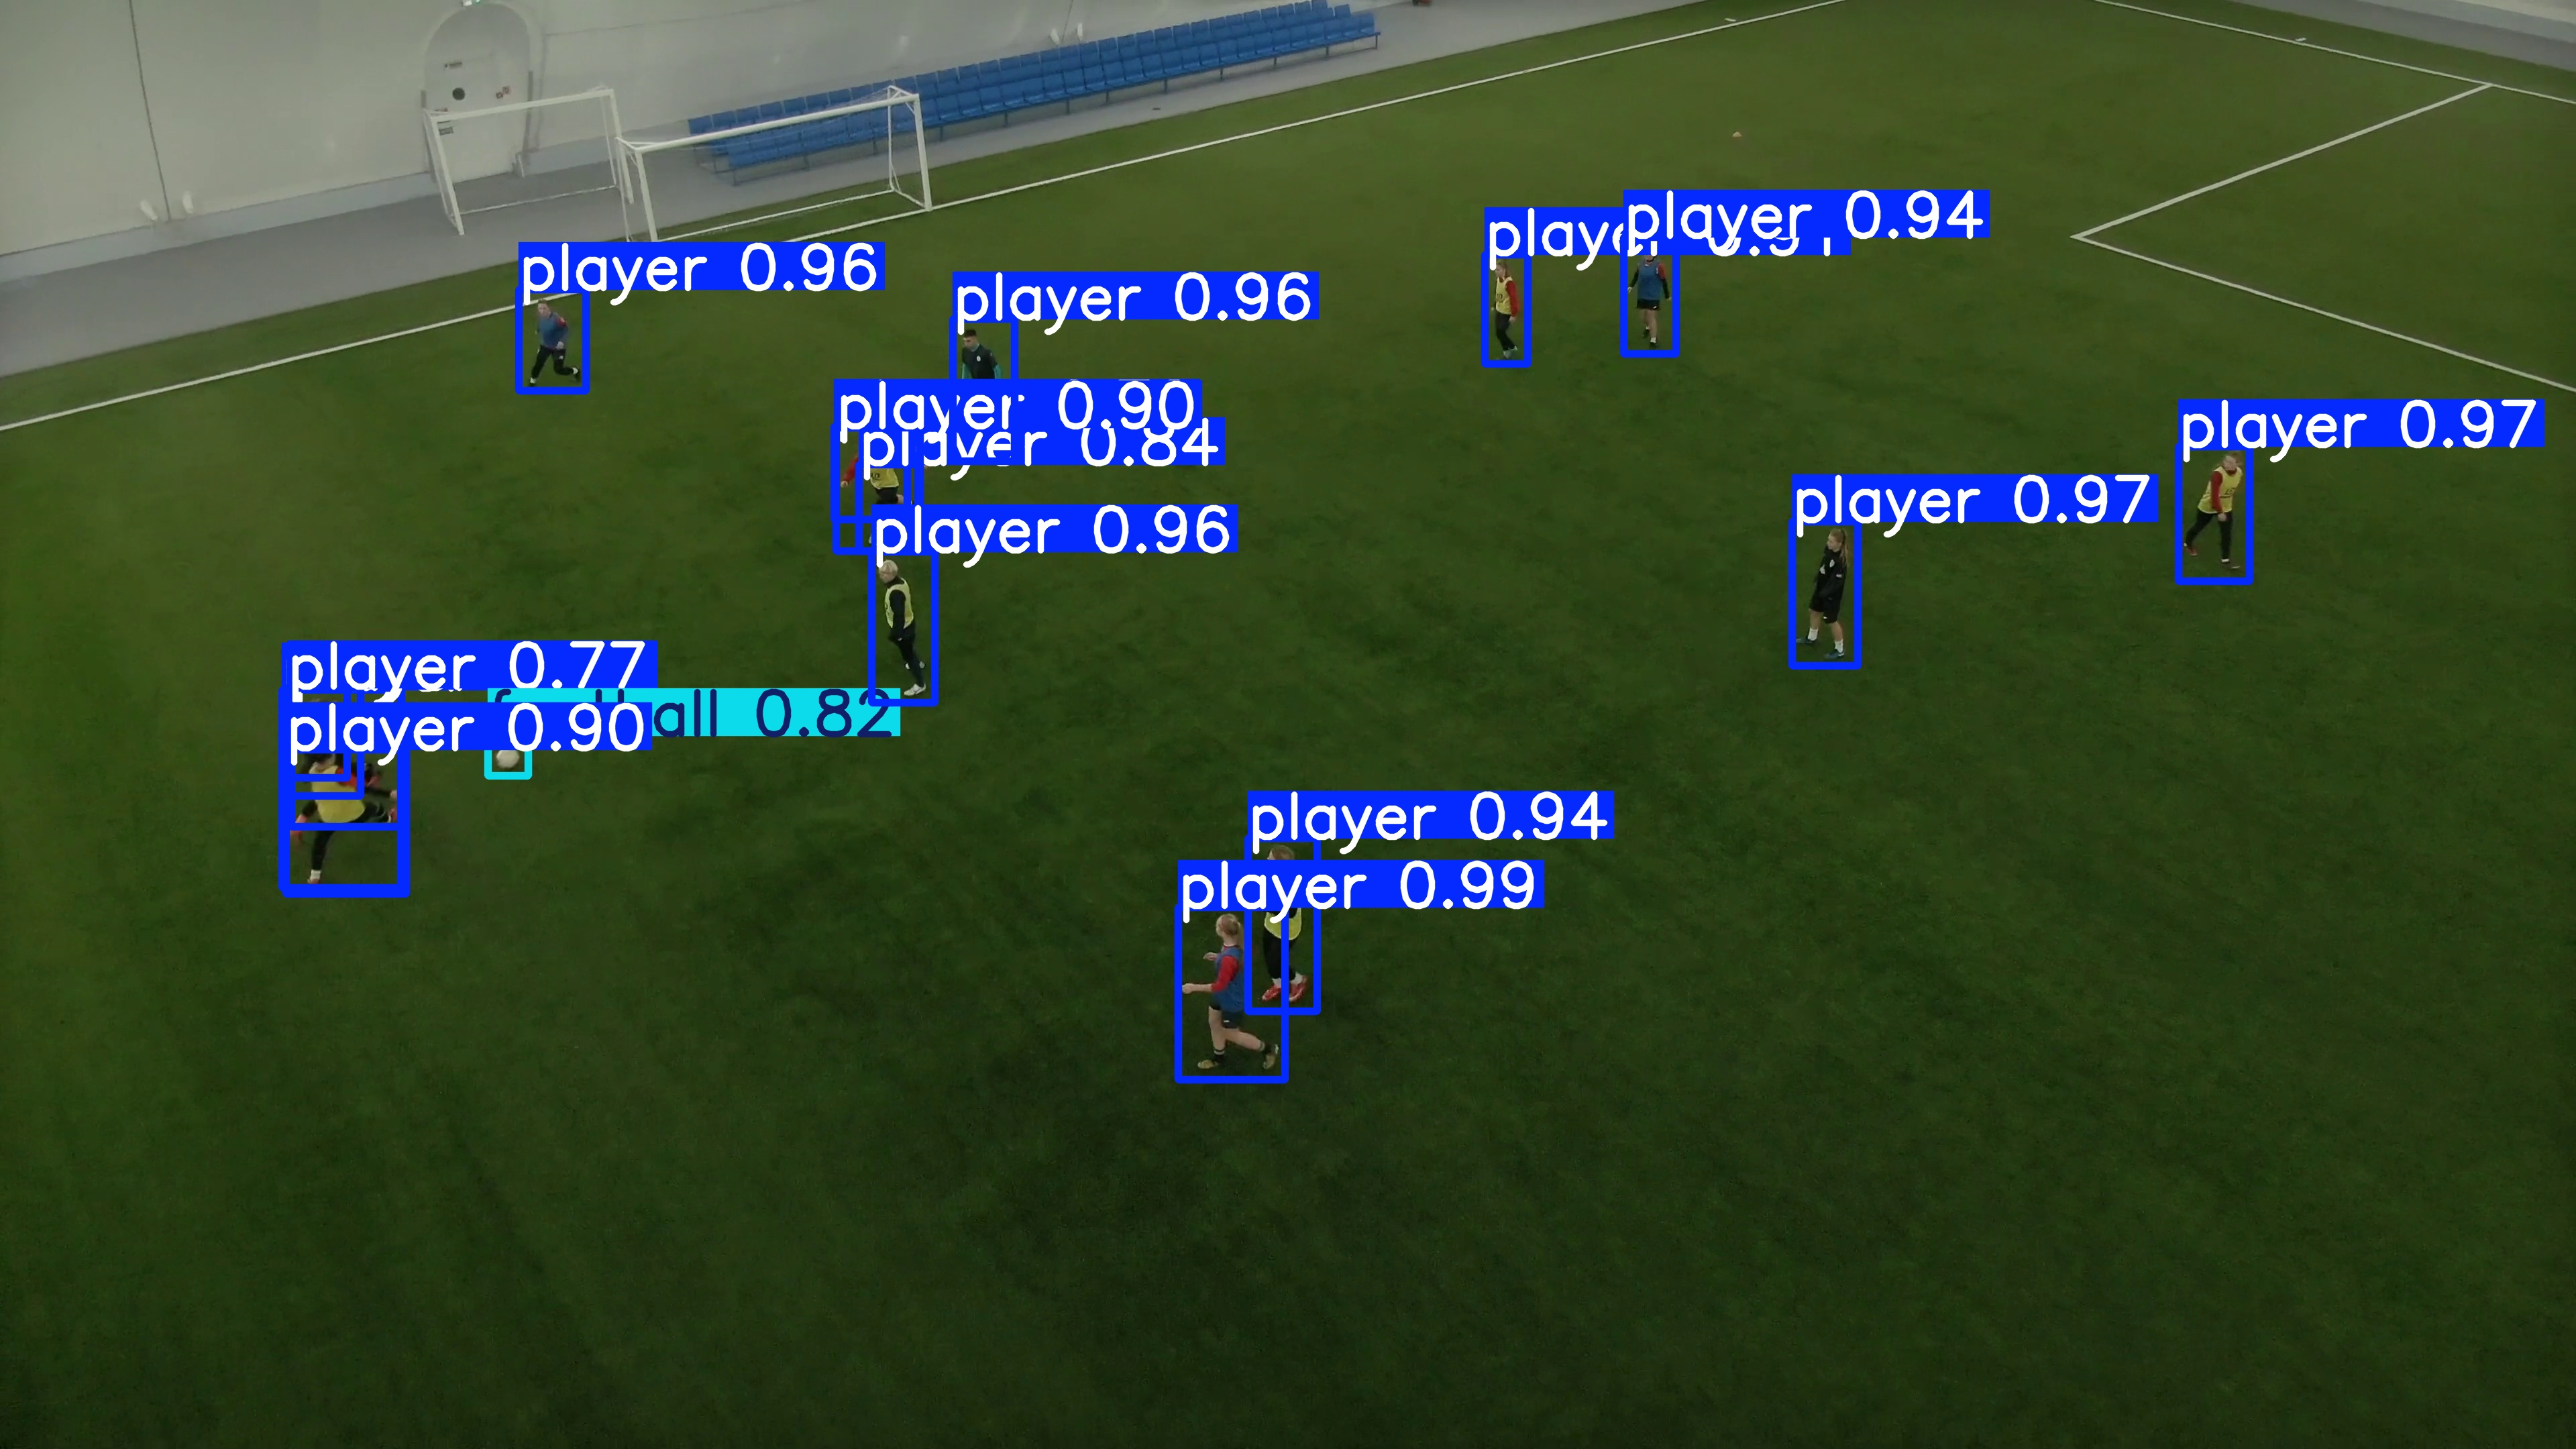

In [20]:
from IPython.display import Image, display
Image(filename='/content/runs/detect/predict/rt3_f_35_rt3.jpg', height=700)

In [21]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football3/weights/best.pt conf=0.55 source='/content/test2.jpg' save=True


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/test2.jpg: 384x640 13 players, 1 football, 36.7ms
Speed: 2.7ms preprocess, 36.7ms inference, 675.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


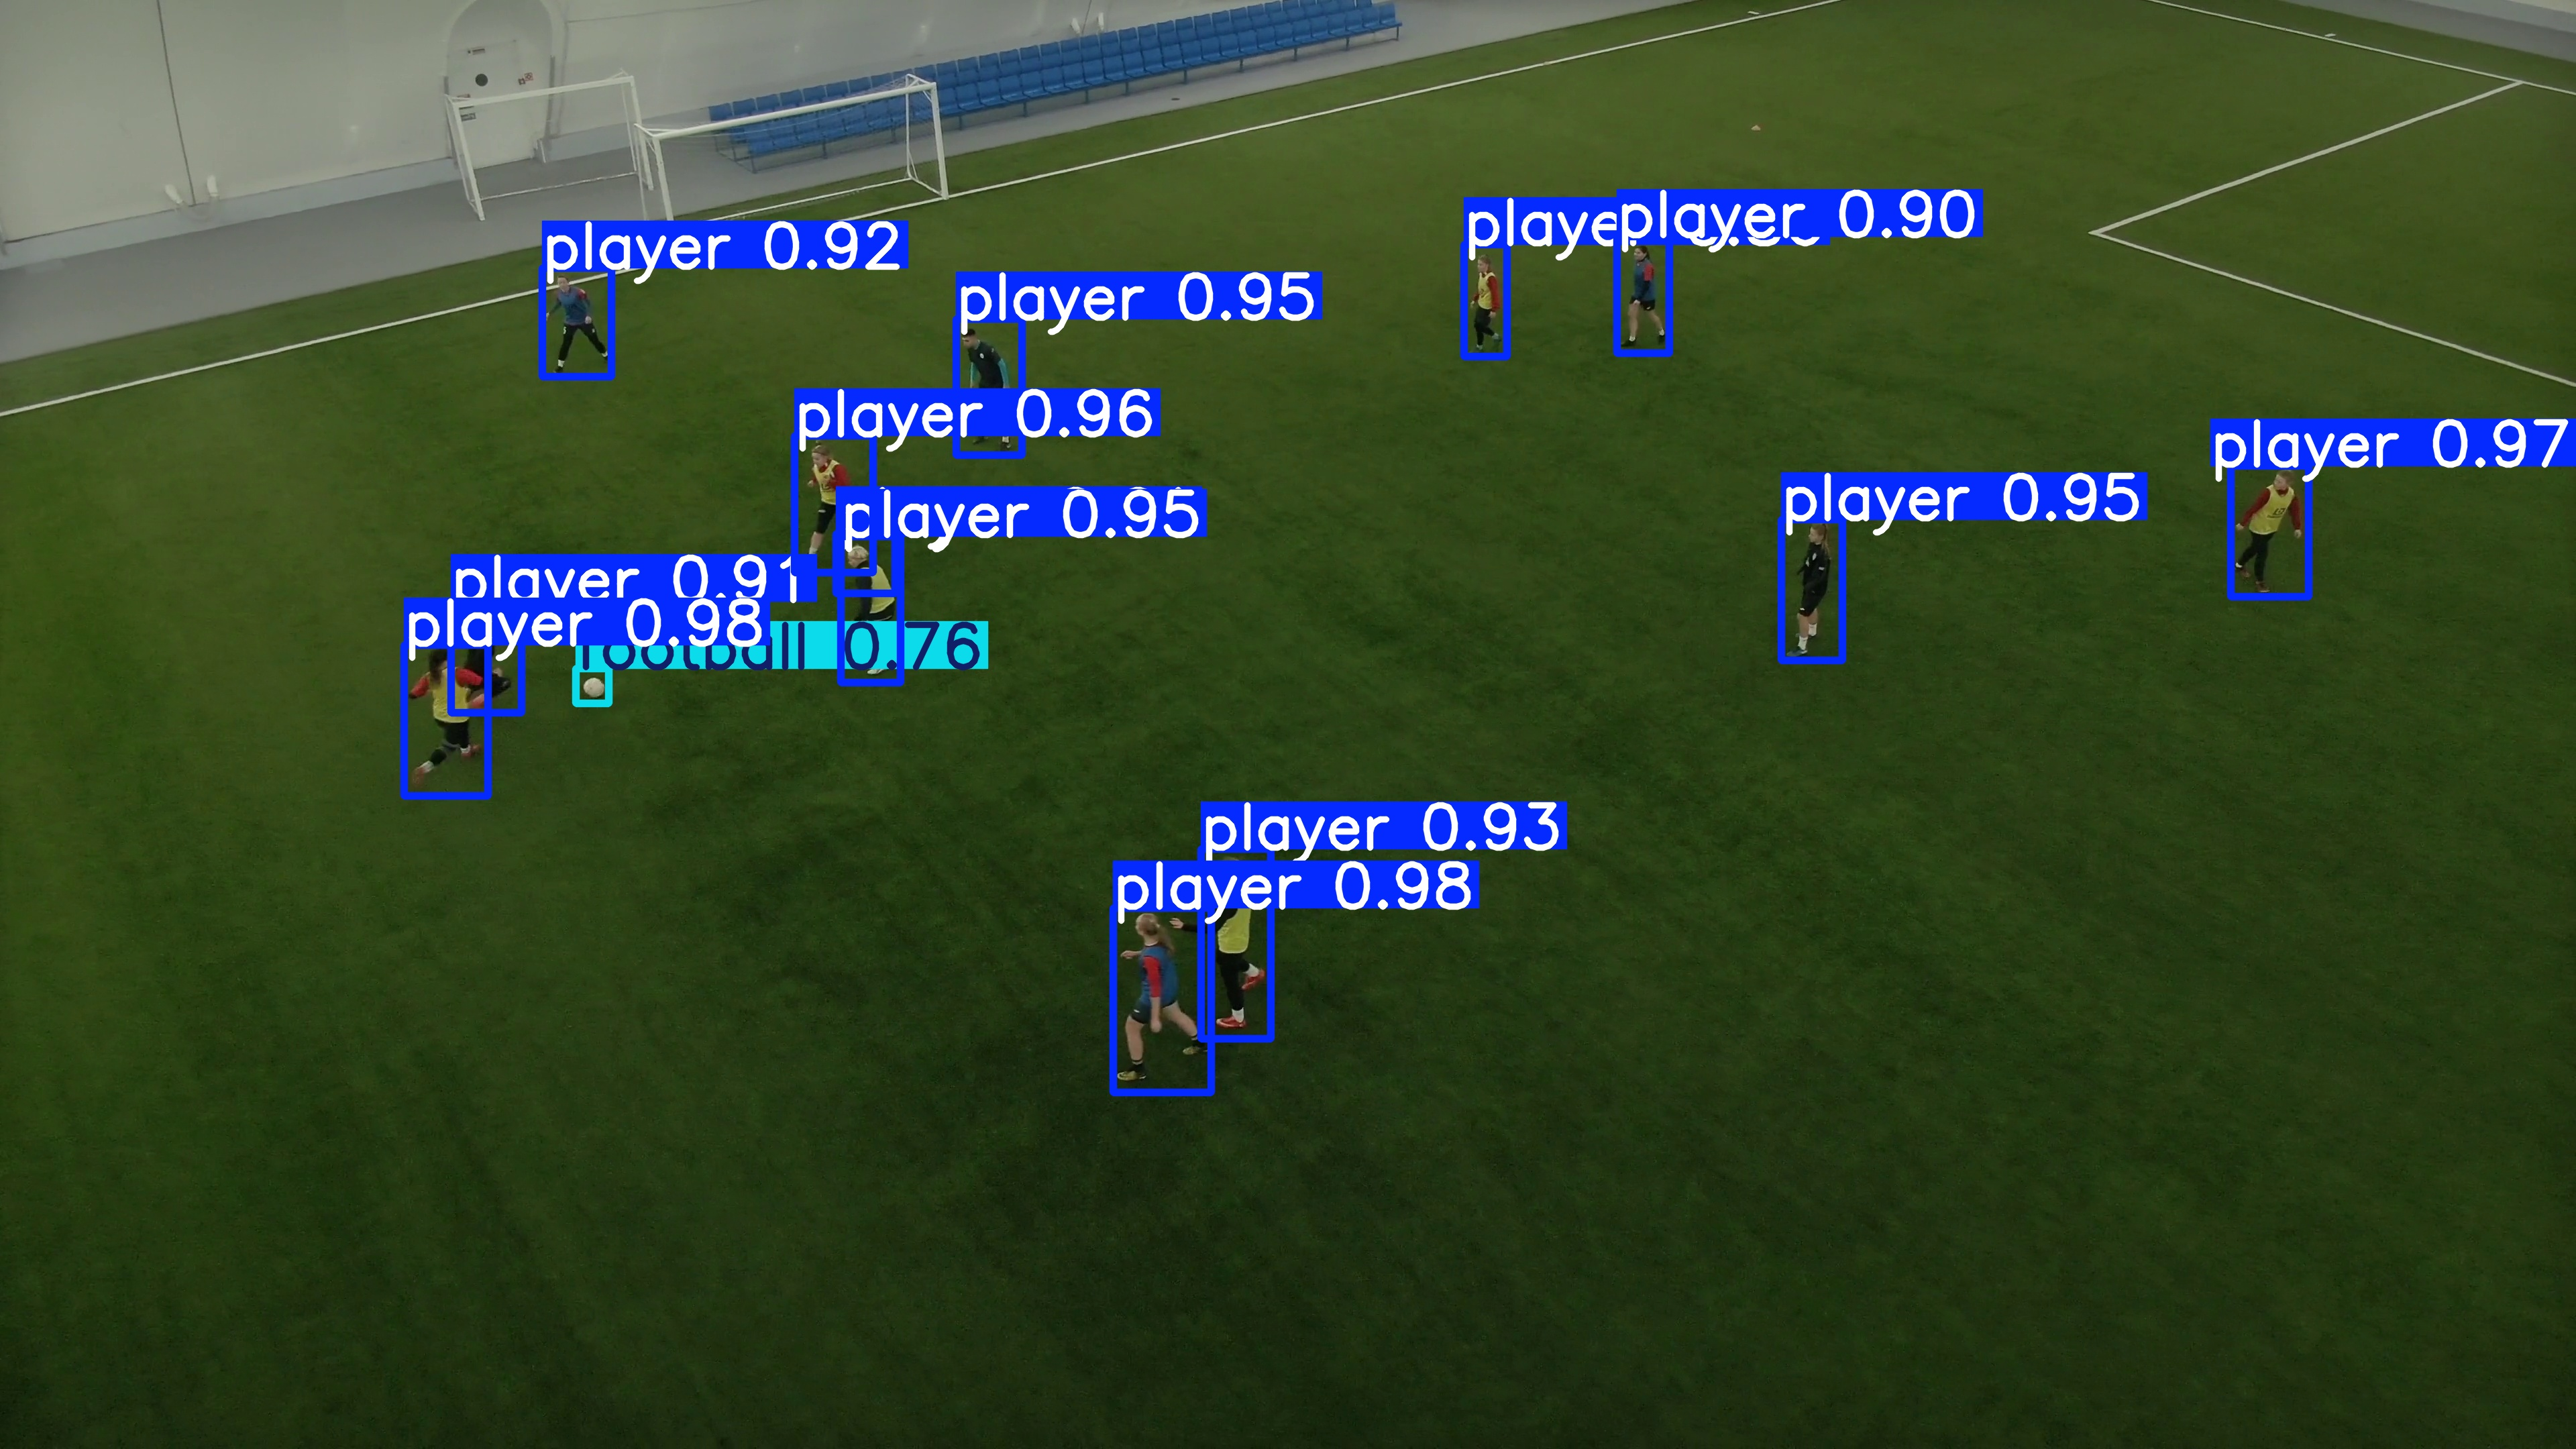

In [22]:

from IPython.display import Image, display
Image(filename='/content/runs/detect/predict2/test2.jpg', height=700)